<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab07_gradient-boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7 - Gradient Boosting

### Author: Szymon Nowakowski


# Introduction
-------------------------
Boosting (and Gradient Boosting) is a powerful ensemble learning method that builds models sequentially to correct errors made by previous models. Unlike Random Forests, which construct trees independently and then aggregate their outputs, Boosting trains models in a stage-wise fashion, minimizing a loss function at each step.

Since you have already studied **CART (Classification and Regression Trees)** and **Random Forests**, this chapter introduces Gradient Boosting as an advanced tree-based method that often outperforms Random Forests in predictive tasks.

# Algorithm: AdaBoost
------------------

Before we begin, let's review the **Adaptive Boosting (AdaBoost) algorithm** for classification.

We assume a training dataset of $n$ samples, $\{(x_i, y_i)\}_{i=1}^{n}$, where $x_i \in \mathbb{R}^d$ are input features and $y_i \in \{-1, +1\}$ are binary class labels.

---

## **Algorithm: AdaBoost**
**Input**: Training data $\{(x_i, y_i)\}_{i=1}^{n}$, weak learner $h(x; \theta)$, number of iterations $M$  
**Output**: Final ensemble model $F_M(x)$  

1. **Initialize** sample weights:  
   $$ w_i^{(1)} = \frac{1}{n}, \quad \forall i \in \{1, \dots, n\} $$

2. **For** $m = 1$ to $M$ **do**:
   1. Train weak classifier $h_m(x)$ using weighted dataset $\{(x_i, y_i, w_i^{(m)})\}$.

   2. Compute weighted classification error:
      $$ \epsilon_m = \frac{\sum_{i=1}^{n} w_i^{(m)} \mathbb{1}(h_m(x_i) \neq y_i)}{\sum_{i=1}^{n} w_i^{(m)}} $$

   3. Compute model weight:
      $$ \alpha_m = \frac{1}{2} \log \frac{1 - \epsilon_m}{\epsilon_m} $$

   4. Update sample weights:
      $$ w_i^{(m+1)} = w_i^{(m)} \exp\left(-\alpha_m y_i h_m(x_i) \right) $$

   5. Normalize weights:
      $$ w_i^{(m+1)} = \frac{w_i^{(m+1)}}{\sum_{j=1}^{n} w_j^{(m+1)}} $$

3. **Return** final classification model:
   $$ F_M(x) = \sum_{m=1}^{M} \alpha_m h_m(x) $$
   $$ \hat{y}(x) = \text{sign}(F_M(x)) $$

---

## **Notes:**
- The weak learner $h(x; \theta)$ is typically a **stump** (a decision tree of depth 1).
- AdaBoost assigns **higher weights to misclassified samples**, making future weak learners focus on harder cases.
- The model weight $\alpha_m$ determines how much influence each weak classifier has on the final prediction.
- The final ensemble decision is based on the **weighted vote** of all weak classifiers.
- Unlike standard regression boosting, AdaBoost uses **exponential reweighting** instead of residual fitting.



# Algorithm: Regression Boosting
------------------

Let's also review the boosting algorithm for regression.

We assume a training dataset of $n$ samples, $\{(x_i, y_i)\}_{i=1}^{n}$, where $x_i \in \mathbb{R}^d$ are input features and $y_i \in \mathbb{R}$ are target values.




## **Algorithm: Regression Boosting**
**Input**: Training data $\{(x_i, y_i)\}_{i=1}^{n}$, weak learner $h(x; \theta)$, number of iterations $M$  
**Output**: Final ensemble model $F_M(x)$  

1. **Initialize** the ensemble model with a constant value (e.g., the mean target value):
   $$ F_0(x) = \frac{1}{n} \sum_{i=1}^{n} y_i $$

2. **For** $m = 1$ to $M$ **do**:
   1. Compute the residuals:
      $$ r_i^{(m)} = y_i - F_{m-1}(x_i), \quad \forall i \in \{1, \dots, n\} $$

   2. Fit a weak learner $h_m(x)$ to predict residuals:
      
      $$ h_m = \arg\min_{\theta} \sum_{i=1}^{n} \left( r_i^{(m)} - h(x_i; \theta) \right)^2 $$

   3. Update the ensemble model:
      $$ F_m(x) = F_{m-1}(x) + \lambda h_m(x) $$

      where $\lambda$ is a shrinkage parameter (learning rate) controlling the contribution of each weak learner.

3. **Return** final model $F_M(x)$.

---

## **Notes:**
- The weak learner $h(x; \theta)$ is typically a shallow regression tree or another simple model.
- This algorithm directly fits weak learners to residual errors.
- The shrinkage parameter $\lambda$ prevents overfitting by controlling the influence of each weak model.



# Forward Stagewise Additive Modelling (FSAM)
------------------

At first glance, the algorithms for **Regression Boosting** and **AdaBoost** appear quite different. However, both can be seen as instances of a **more general framework**: **Forward Stagewise Additive Modelling (FSAM)**.

FSAM builds a function $F(x)$ incrementally by minimizing a loss function $L(y, F(x))$ in a stagewise fashion.



## **Algorithm: Forward Stagewise Additive Modeling**


**Input**: Training data $\{(x_i, y_i)\}_{i=1}^{N}$, number of iterations $M$

**Output**: Estimated function $\hat{f}(x)$

1. **Initialize** the function estimate:
   $$
   f_0(x) = 0
   $$

2. **For** $m = 1$ to $M$:
   - (a) Compute:
     $$
     (\beta_m, \gamma_m) = \arg\min_{\beta, \gamma} \sum_{i=1}^{N} L(y_i, f_{m-1}(x_i) + \beta b(x_i; \gamma))
     $$
   - (b) Update the function estimate:
     $$
     f_m(x) = f_{m-1}(x) + \beta_m b(x; \gamma_m)
     $$

3. **Output** the final model:
   $$
   \hat{f}(x) = f_M(x)
   $$

**Notes**:
- The basis functions $b(x; \gamma)$ are typically simple functions (e.g., decision stumps or trees) parameterized by $\gamma$.
- The algorithm incrementally builds the model by adding new basis functions at each iteration to minimize the loss function $L(y, f(x))$.
- The choice of loss function $L$ influences the behavior and robustness of the model.




### Role of $\gamma$ (Structure Parameter)

$\gamma$ parametrizes the basis function $b(x; \gamma)$.  
It determines the structure or specific form of the weak learner being added.

**Example:**  
- If $b(x; \gamma)$ is a **decision tree**, then $\gamma$ could represent:
  - The split point(s) of the tree.
  - The features chosen for splitting.
  - The depth of the tree.
- If $b(x; \gamma)$ is a **linear function**, then $\gamma$ could be:
  - The slope and intercept of the line.


### Role of $\beta$ (Scaling Parameter)

$\beta$ determines how much influence the new basis function $b(x; \gamma)$ has in the updated model.  
It acts as a coefficient that controls the step size in the direction of the selected weak learner.

**Example:**  
If we are minimizing squared error, $\beta$ could be chosen as:

$$
\beta_m = \arg\min_{\beta} \sum_{i=1}^{N} \left( y_i - ( f_{m-1}(x_i) + \beta b(x_i; \gamma_m) ) \right)^2
$$

which means we find $\beta$ that minimizes the squared error after adding the weak learner.

If $b(x; \gamma)$ is a **decision tree predicting residuals**, $\beta$ **scales the tree’s predictions** before adding it to the ensemble.

Thus, $\beta$ controls the **contribution (weight) of each new weak learner** in the final boosted model.
With $\beta = 1.0$, the model would assume that the weak learner's predictions are **perfectly scaled** to correct the residual errors. However, this is rarely the case.

## Connection of FSAM and other Boosting Techniques

📚 **See also** → *The Elements of Statistical Learning*:  
Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer, 2009.  
[📖 Link to the book](https://hastie.su.domains/ElemStatLearn/)
(Chapter 10.3)

For the squared loss function:

$$
L(y,F(x))=(y−F(x))^2
$$

substituting this into the given equation gives:

$$
(\beta_m, \gamma_m) = \arg\min_{\beta, \gamma} \sum_{i=1}^{N} (y_i - (f_{m-1}(x_i) + \beta b(x_i; \gamma)))^2
$$

Now, rewriting in terms of residuals:

$$
r_i^{(m)} = y_i - f_{m-1}(x_i)
$$

Substituting $r_i^{(m)}$ into the equation:

$$
(\beta_m, \gamma_m) = \arg\min_{\beta, \gamma} \sum_{i=1}^{N} (r_i^{(m)} - \beta b(x_i; \gamma))^2
$$

This shows that in the case of squared loss, the optimization problem in Forward Stagewise Additive Modeling naturally decomposes into residual fitting which (modulo shrinkage parameters) is in essence Regression Boosting.

Similarly, we can show that AdaBoost is the Forward Stagewise Additive Modeling algorithm with exponential loss $L(y, F(x)) = e^{-yF(x)}$.


## Visualising Loss Functions - Classification

I will reproduce **Figure 10.4** from the *The Elements of Statistical Learning* book.

All losses are shown as functions of the margin $x = yf$, where $y \in \{\pm1\}$ is the label and $f$ is the real-valued prediction. By defining everything in terms of $x = yf$, each loss becomes a one-dimensional function $L(x)$. Let's also ensure that each loss passes through $(0,1)$.


### How We Handle Functions Not Obviously in Terms of $x = yf$

1. **Cross-Entropy (Logistic) Loss**

  The standard form for a label $y \in \{\pm1\}$ and prediction $f$ is:

  $$
  L_{\text{logistic}}(y, f) = \log(1+e^{-yf}).
  $$

  By setting $x = yf$, this becomes:

  $$
  \log(1+e^{-x}).
  $$

  Since $\log(1+e^0) = \log(2)$, we divide by $\log(2)$ so that $L(0) = 1$.

2. **Squared Error**

  If the model aims to fit $y \in \{\pm1\}$ with a real-valued $f$, the squared loss is:

  $$
  (y - f)^2.
  $$

  In terms of $x = yf$:

  - If $y = +1$, then $x = f$, and so:

    $$
    (1 - f)^2 = (1 - x)^2.
    $$

  - If $y = -1$, then $x = -f$, and so:

    $$
    (y - f)^2 = (-1 - f)^2.
    $$

    This also reduces to:

    $$
    (1 - x)^2
    $$

    when expressed in $x$.

All these formulations ensure each curve intersects the point $(0,1)$, making for an intuitive comparison of how different losses penalize mistakes around the decision boundary ($x = 0$).


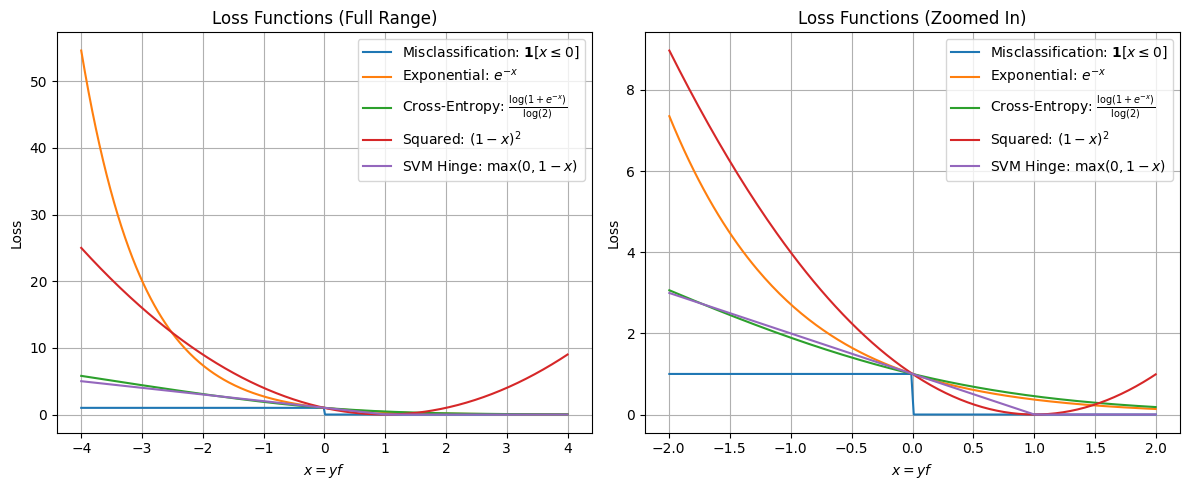

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x = y f for full computation (-4 to 4)
x_full = np.linspace(-4, 4, 400)

# Compute loss functions over the full range
misclassification = (x_full <= 0).astype(float)  # Misclassification Error
exponential_loss = np.exp(-x_full)  # Exponential Loss
logistic_loss = np.log(1 + np.exp(-x_full)) / np.log(2)  # Binomial Cross-Entropy Loss = Logistic Loss (scaled)
squared_loss = (1 - x_full) ** 2  # Squared Error Loss
hinge_loss = np.maximum(0, 1 - x_full)  # SVM Hinge Loss

# Store computed losses in a dictionary with proper mathematical labels
losses = {
    r'Misclassification: $\mathbf{1}[x \leq 0]$': misclassification,
    r'Exponential: $e^{-x}$': exponential_loss,
    r'BinCross-Entropy: $\frac{\log(1 + e^{-x})}{\log(2)}$': logistic_loss,
    r'Squared: $(1 - x)^2$': squared_loss,
    r'SVM Hinge: $\max(0, 1 - x)$': hinge_loss
}

# Define the zoomed-in range (-2 to 2) by selecting the precomputed values
zoom_indices = (x_full >= -2) & (x_full <= 2)
x_zoom = x_full[zoom_indices]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot full range (-4 to 4)
for label, loss_values in losses.items():
    axes[0].plot(x_full, loss_values, label=label)

axes[0].set_xlabel(r'$x = y f$')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Functions (Full Range)')
axes[0].legend()
axes[0].grid(True)

# Plot zoomed-in range (-2 to 2) using precomputed values
for label, loss_values in losses.items():
    axes[1].plot(x_zoom, loss_values[zoom_indices], label=label)

axes[1].set_xlabel(r'$x = y f$')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss Functions (Zoomed In)')
axes[1].legend()
axes[1].grid(True)

# Show plots
plt.tight_layout()
plt.show()


## Visualizing Loss Functions - Regression

I will reproduce **Figure 10.5** from *The Elements of Statistical Learning*; this time for regression loss functions.

All losses are shown as functions of the **prediction error** $x = y - f$, where $y$ is the true target value, and $f$ is the real-valued prediction. By defining everything in terms of $x = y - f$, each loss function becomes a one-dimensional function $L(x)$.

This allows for a direct comparison of different regression loss functions, highlighting their sensitivity to errors and their robustness to outliers.


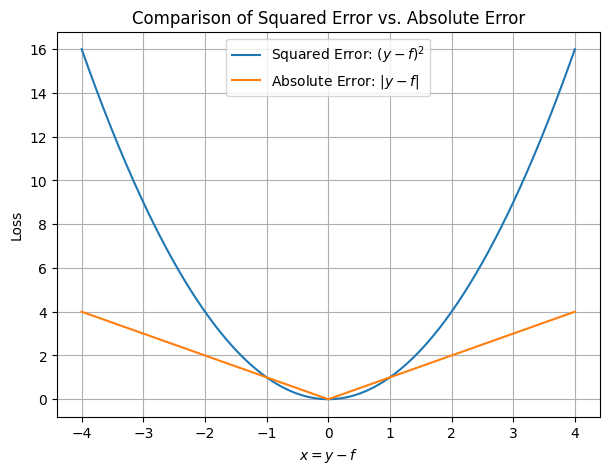

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x = y - f (difference between true label and prediction)
x = np.linspace(-4, 4, 400)

# Compute the loss functions
squared_error_loss = (x) ** 2  # Squared Error Loss: (y - f)^2
absolute_error_loss = np.abs(x)  # Absolute Error Loss: |y - f|

# Store computed losses with proper mathematical labels
losses = {
    r'Squared Error: $(y - f)^2$': squared_error_loss,
    r'Absolute Error: $|y - f|$': absolute_error_loss
}

# Create a plot
plt.figure(figsize=(7, 5))

# Plot the losses
for label, loss_values in losses.items():
    plt.plot(x, loss_values, label=label)

# Labels and title
plt.xlabel(r'$x = y - f$')
plt.ylabel('Loss')
plt.title('Comparison of Squared Error vs. Absolute Error')

# Legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Problems with FSAM

The problem is that FSAM translates into managable computationally algorithms for unrobust loss functions (exponential loss, squared error loss). However, for robust loss functions (e.g. **classification**: *binary cross entropy loss*, which behaves linearly over wide ranges of values, **regression**: *absolute error*) the FSAM algorithm is fundamentally more difficut. **Understanding that problem will be a focus of the homework assignment for this class.**


## The Idea Behind Gradient Boosting

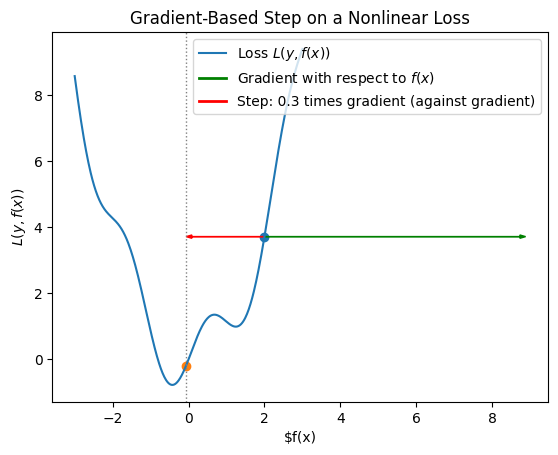

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a non-linear function and its derivative (gradient in 1D)
def f(x):
    return x**2 + np.sin(3*x)

def df(x):
    return 2*x + 3*np.cos(3*x)

# Generate data for plotting
x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

# Pick an initial point that is not a minimum
x0 = 2.0
y0 = f(x0)

# Compute the gradient (derivative) at this point
grad0 = df(x0)

# Take a step "against" (negative) the gradient direction
alpha = 0.3  # step size
x1 = x0 - alpha * grad0

# Plot the function
plt.figure()
plt.plot(x_vals, y_vals, label='Loss $L(y,f(x))$')

# Mark the initial point (x0, f(x0)) and the next point (x1, f(x1))
plt.scatter(x0, y0)
plt.scatter(x1, f(x1))

# Draw an arrow showing the gradient at x0
# (in 1D, we visualize this by drawing a small arrow indicating slope direction)
arrow_dx = grad0  # just for arrow length scaling
plt.arrow(x0, y0,
          arrow_dx, 0,
          head_width=0.1, length_includes_head=True, color="green")
green_arrow_legend = plt.Line2D([0], [1], color="green", lw=2, label="Gradient with respect to $f(x)$")


# Draw an arrow showing the step against the gradient (from x0 to x1)
plt.arrow(
    x0, y0,
    (x1 - x0), 0,
    head_width=0.1, length_includes_head=True, color = "red"
)
red_arrow_legend = plt.Line2D([0], [1], color="red", lw=2, label=f'Step: {alpha} times gradient (against gradient)')
plt.axvline(x=x1, color='grey', linestyle='dotted', linewidth=1)


# Annotations and legend
plt.title('Gradient-Based Step on a Nonlinear Loss')
plt.xlabel('$f(x)')
plt.ylabel('$L(y,f(x))$')
# Get existing legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Append the new arrow legend
handles.append(green_arrow_legend)
handles.append(red_arrow_legend)

# Set the legend with all items
plt.legend(handles=handles, loc='upper right')
plt.show()


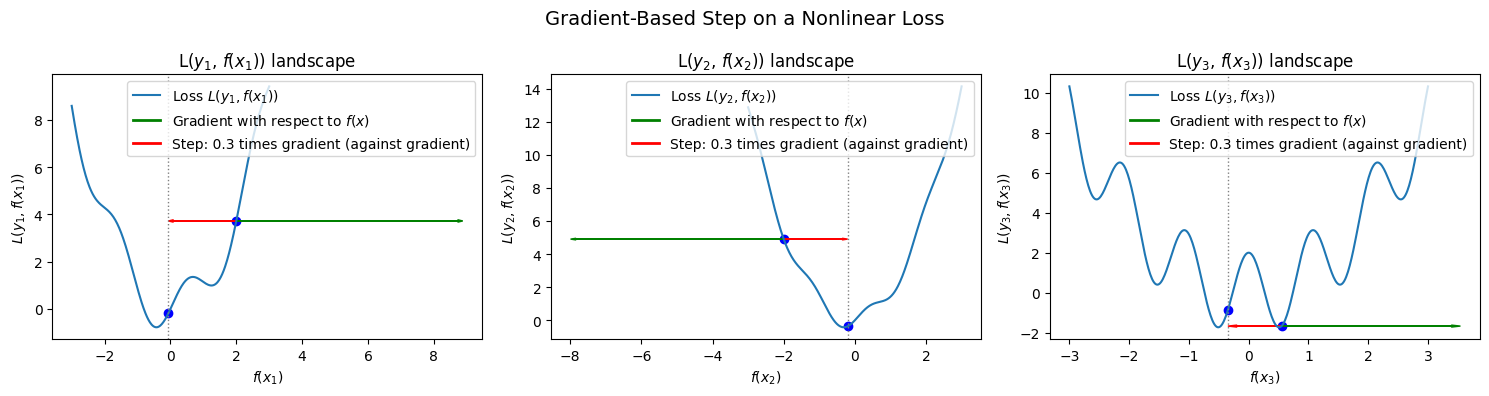

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##############################################################################
# We define three slightly different "loss landscapes" f1, f2, f3,
# each with its own gradient, and choose different starting points
# x_1, x_2, x_3 so that we can visualize three separate scenarios side by side.
##############################################################################

# -------------------------------------------------------------------------
# 1) Loss landscape #1
# -------------------------------------------------------------------------
def f1(x):
    # A mildly wavy parabola
    return x**2 + np.sin(3*x)

def df1(x):
    return 2*x + 3*np.cos(3*x)

x_1 = 2.0  # starting point (not a minimum) for scenario 1

# -------------------------------------------------------------------------
# 2) Loss landscape #2
# -------------------------------------------------------------------------
def f2(x):
    # A different non-linear shape
    return 1.5*(x**2) + 0.5*np.sin(4*x) + 0.3*x

def df2(x):
    return 3.0*x + 2.0*np.cos(4*x) + 0.3

x_2 = -2.0  # starting point for scenario 2

# -------------------------------------------------------------------------
# 3) Loss landscape #3
# -------------------------------------------------------------------------
def f3(x):
    # Another shape with multiple oscillations so we don't minimize in one step
    return x**2 + 2.0*np.cos(6*x)

def df3(x):
    return 2*x - 12.0*np.sin(6*x)

x_3 = 0.55  # starting point for scenario 3

# Same step size alpha for all three scenarios
alpha = 0.3


##############################################################################
# Utility to make each subplot replicate the style and legend
# from the original single-plot code. We just parametrize the function
# and starting point.
##############################################################################
def plot_scenario(ax, f, df, x_start, scenario_index):
    """
    ax            : Matplotlib axis where we plot
    f, df         : Non-linear function and its derivative
    x_start       : Initial x_i
    scenario_index: 1, 2, or 3 (used for labeling)
    """

    # Generate data
    x_vals = np.linspace(-3, 3, 400)
    y_vals = f(x_vals)

    # Evaluate function and gradient at the starting point
    y_start = f(x_start)
    grad_start = df(x_start)

    # Take a step against the gradient
    x_next = x_start - alpha * grad_start
    y_next = f(x_next)

    # Plot the function
    # Label matches original style but subscripts x_i, y_i
    ax.plot(x_vals, y_vals, label=fr'Loss $L(y_{{{scenario_index}}}, f(x_{{{scenario_index}}}))$')

    # Mark the points
    ax.scatter(x_start, y_start, color='blue')
    ax.scatter(x_next, y_next, color='blue')

    # Draw an arrow showing the gradient at x_start (horizontal arrow):
    arrow_dx = grad_start  # for arrow length in the x-direction
    ax.arrow(
        x_start, y_start,
        arrow_dx, 0,
        head_width=0.1, length_includes_head=True, color="green"
    )
    # Legend entry for the green arrow:
    green_arrow_legend = plt.Line2D(
        [0], [0], color="green", lw=2,
        label="Gradient with respect to $f(x)$"
    )

    # Draw an arrow showing the step against the gradient
    ax.arrow(
        x_start, y_start,
        (x_next - x_start), 0,
        head_width=0.1, length_includes_head=True, color="red"
    )
    # Legend entry for the red arrow:
    red_arrow_legend = plt.Line2D(
        [0], [0], color="red", lw=2,
        label=f'Step: {alpha} times gradient (against gradient)'
    )

    # Vertical dotted line where we land
    ax.axvline(x=x_next, color='grey', linestyle='dotted', linewidth=1)

    # Subplot title as requested:
    ax.set_title(fr'L($y_{{{scenario_index}}}$, $f(x_{{{scenario_index}}}$)) landscape')

    # Axis labels as requested
    ax.set_xlabel(fr'$f(x_{{{scenario_index}}})$')
    ax.set_ylabel(fr'$L(y_{{{scenario_index}}}, f(x_{{{scenario_index}}}))$')

    # Collect existing legend handles
    handles, labels = ax.get_legend_handles_labels()

    # Append arrow legends
    handles.append(green_arrow_legend)
    handles.append(red_arrow_legend)

    ax.legend(handles=handles, loc='upper right')


##############################################################################
# Create a single figure with 3 subplots side by side
##############################################################################
fig = plt.figure(figsize=(15,4))
fig.suptitle('Gradient-Based Step on a Nonlinear Loss', fontsize=14)

# Subplot 1
ax1 = fig.add_subplot(1,3,1)
plot_scenario(ax1, f1, df1, x_1, scenario_index=1)

# Subplot 2
ax2 = fig.add_subplot(1,3,2)
plot_scenario(ax2, f2, df2, x_2, scenario_index=2)

# Subplot 3
ax3 = fig.add_subplot(1,3,3)
plot_scenario(ax3, f3, df3, x_3, scenario_index=3)

plt.tight_layout()
plt.show()


## Step $m$


Consider that we already have a prediction $f_m$ defined on our problem domain, in particular we map each datapoint $x_i$ to $f_m(x_i)$.

## Step $m$$+1$

It is thus thinkable, that for each datapoint $x_i$ the loss gets smaller when we add to the existing prediction $f_m(x_i)$ a new value $v_i$, equal to a step taken against the gradient direction with a small step size $\eta$:

$$
v_i =  - \eta \left[ \frac{\partial L(y_i, f_m(x_i))}{\partial f_m(x_i)} \right]
$$

The problem with this approach is that the $f_{m+1}(x_i) = f_m(x_i) + v_i$ is **no longer** defined in the problem domain, but only in the data points $x_i$.


## Extending This Idea to Gradient Boosting



Gradient Boosting builds an additive model of weak learners (typically decision trees) to minimize a given loss function. The model is updated iteratively.



### **Algorithm: Gradient Boosting**
**Input**: Training data $\{(x_i, y_i)\}_{i=1}^{n}$, weak learner $h(x; \theta)$, number of iterations $M$  
**Output**: Final ensemble model $f_M(x)$  

1. Start with an initial model, typically a constant value:

   $$ f_0(x) = \arg\min_c \sum_{i=1}^{n} L(y_i, c) $$

   where $L(y_i, c)$ is the loss function (e.g., squared loss for regression or log loss for classification).

2. For each iteration $m < M$, compute the residuals (pseudo-residuals):

   $$ r_{i}^{(m)} = -\left[ \frac{\partial L(y_i, f_m(x_i))}{\partial f_m(x_i)} \right] $$

   This represents the negative gradient of the loss function.

3. Fit a new weak learner $h^{(m)}(x)$ (a shallow decision tree) to predict these residuals.
   - This new weak learner **might NOT** predict the residuals in the datapoints perfectly
   - This new weak learner is defined on the whole problem domain

4. Update the model:

   $$ f_{m+1}(x) = f_m(x) + \eta \cdot h^{(m)}(x) $$

   where $\eta$ (learning rate) controls the contribution of each weak learner.


## Multiple Additive Regression Trees (MART) Algorithm

📚 **See also** → *The Elements of Statistical Learning*:  
Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer, 2009.  
[📖 Link to the book](https://hastie.su.domains/ElemStatLearn/)
(Algorithm 10.3)

An actual Multiple Additive Regression Trees (MART) has one more complication - it varies the step size $\eta$ depending on the terminal region of the resulting tree.


### **Algorithm: Multiple Additive Regression Trees (MART)**
**Input**: Training data $\{(x_i, y_i)\}_{i=1}^{n}$, CART tree $t(x)$ of certain/limited depth, number of iterations $M$  
**Output**: Final ensemble model $f_M(x)$

1. Start with an initial model, typically a constant value:

   $$ f_0(x) = \arg\min_c \sum_{i=1}^{n} L(y_i, c) $$

   where $L(y_i, c)$ is the loss function.

2. For each iteration $m < M$, compute the residuals (pseudo-residuals):

   $$ r_{i}^{(m)} = -\left[ \frac{\partial L(y_i, f_m(x_i))}{\partial f_m(x_i)} \right] $$

   This represents the negative gradient of the loss function.

3. Fit a new regression tree $t^{(m)}(x)$ to predict these residuals;
   - consider $R_j^{(m)}$ to be the terminal regions of $t^{(m)}(x)$, $j=1, \ldots, J^{(m)}$
   - consider $\gamma_j^{(m)}$ to be the optimal prediction in $j$-th region, but not in the sense of pseudo-residuals, but rather the final fit i.e.
   $$
    \gamma_j^{(m)} = \arg\min_{\gamma} \sum_{x_i \in R_j^{(m)}} L(y_i, f_m(x_i) + \gamma)
   $$

   **REMARK** That looks just like a hard optimization problem from Forward Stagewise Procedure - the one that we are trying to avoid in a first place. But note, that in popular implementations (like XGBoost, LightGBM), once the tree structure is decided, the update $\gamma_{jm}$ in each leaf is found by using a localized quadratic approximation to the loss (a single-step Newton update). That typically produces a simple closed-form formula for $\gamma_{jm}$ in terms of the sum of gradients and sum of Hessians of the samples in that leaf.

4. Update the model:

   $$ f_{m+1}(x) = f_m(x) + \sum_{j=1}^{J_m} \gamma_j^{(m)} \mathbf{1}(x \in R_j^{(m)}) $$ or in some implementations
   $$ f_{m+1}(x) = f_m(x) + \eta \sum_{j=1}^{J_m} \gamma_j^{(m)} \mathbf{1}(x \in R_j^{(m)}) $$
   where $\eta$ (learning rate) controls the contribution of each weak learner. Note, that especially in the latter case, $\gamma_j^{(m)}$ need not be fully optimized.


This algorithm is constructed for regression, but it naturally extends to classification, too.



## Comparing Gradient Boosting to Random Forests

| Feature              | Random Forests                          | Gradient Boosting                    |
|----------------------|--------------------------------|--------------------------------|
| Model Structure     | Ensemble of independent trees | Trees built sequentially       |
| Training Process   | Uses bagging (parallel training) | Boosting (sequential corrections) |
| Overfitting Risk   | Lower (averaging reduces variance) | Higher (but can be controlled) |
| Performance        | Strong, but may not optimize loss | Often superior for complex tasks |
| Speed             | Faster (can be parallelized) | Slower (sequential training) |

**Gradient Boosting algorithm is the off-shelf algorithm of choice in many applications. It is in many cases superior to Random Forests.**





## Hyperparameters in Gradient Boosting

Tuning hyperparameters is crucial for Gradient Boosting performance. Key parameters include:

- **Learning rate $\eta$**: Controls the speed of learning.
- **Number of Trees $M$**: Too many trees may lead to overfitting.
- **Tree Depth $d$**: Controls the complexity of each tree. Shallow trees (e.g., depth = 3-5) work well.
- **Subsample**: Fraction of data used to train each tree, introducing randomness (like in Random Forests). One can sumbsample both rows and features.



In the next section, we will implement Gradient Boosting in Python using `scikit-learn` and `XGBoost`.


## The Breast Cancer Data

We will use the Breast Cancer dataset from scikit-learn. This dataset has features computed from digitized images of a breast mass, and the label indicates *malignant* vs. *benign* tumors.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score

# 1) Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data      # Features
y = data.target    # Target (0 = malignant, 1 = benign)

# 2) Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set size:", X_train.shape, "Test set size:", X_test.shape)

Training set size: (398, 30) Test set size: (171, 30)


## XGBoost in Python

in the XGBoost below we'll be using the same partityion of data into training/test data as we used in the previous (tree related) class.

XGBoost - Train Accuracy: 1.0
XGBoost - Test Accuracy: 0.9766081871345029

Feature Importances:
f1: 19.0000
f2: 1.0000
f4: 10.0000
f5: 10.0000
f6: 3.0000
f7: 15.0000
f8: 3.0000
f9: 2.0000
f10: 9.0000
f11: 2.0000
f12: 4.0000
f13: 15.0000
f14: 3.0000
f15: 12.0000
f16: 3.0000
f17: 6.0000
f18: 13.0000
f19: 7.0000
f20: 13.0000
f21: 23.0000
f22: 14.0000
f23: 14.0000
f24: 10.0000
f25: 1.0000
f26: 17.0000
f27: 15.0000
f28: 15.0000
f29: 2.0000


<Figure size 1000x500 with 0 Axes>

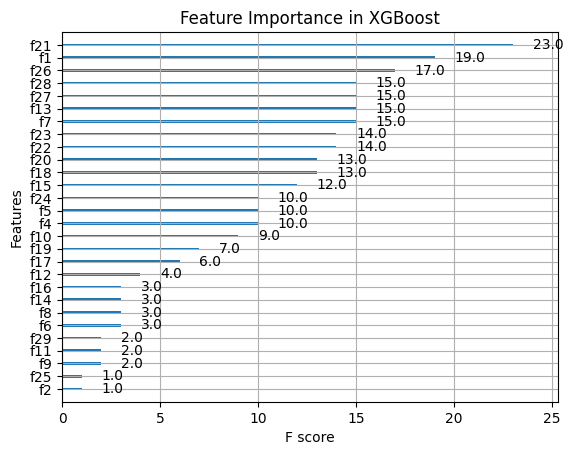

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# We assume X_train, X_test, y_train, y_test have already been defined,
# as in the previous CART examples.

# Convert data to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 1) Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Common evaluation metric
    'max_depth': 3,                    # Tree depth
    'eta': 0.2,                        # Learning rate
    'subsample': 0.8,                  # Row sampling
    'colsample_bytree': 0.8,           # Feature sampling
    'random_state': 42
}

# 2) Train the XGBoost model
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

# 3) Predict on train & test data
y_pred_train = (bst.predict(dtrain) > 0.5).astype(int)
y_pred_test = (bst.predict(dtest) > 0.5).astype(int)

# 4) Evaluate
train_acc = accuracy_score(y_train, y_pred_train)
print("XGBoost - Train Accuracy:", train_acc)
test_acc = accuracy_score(y_test, y_pred_test)
print("XGBoost - Test Accuracy:", test_acc)

# 5) Inspect Feature Importances
feature_importance = bst.get_score(importance_type='weight')

# Print feature importances
print("\nFeature Importances:")
for name, importance in feature_importance.items():
    print(f"{name}: {importance:.4f}")

# Visualize feature importances
plt.figure(figsize=(10, 5))
xgb.plot_importance(bst)
plt.title("Feature Importance in XGBoost")
plt.show()


## Feature Importance in XGBoost

Feature importance in XGBoost measures how useful or valuable each feature was in constructing the boosted decision trees. XGBoost provides multiple ways to calculate feature importance:

- **Weight (FScore)** – Number of times a feature is used in a tree split. It is strictly a frequentional measure.
- **Gain** – The average improvement in loss (e.g., log-loss for classification) when a feature is used in a split.
- **Cover** – The average number of training samples affected by splits using this feature.



## Comparison with Single Tree and Random Forest Feature Importance

| **Model** | **Feature Importance Calculation** | **Strengths** | **Weaknesses** |
|-----------|-----------------------------------|---------------|---------------|
| **Single Decision Tree** | Importance is based on Gini impurity decrease (classification) or variance reduction (regression) at each split. | Intuitive, fast computation. | Unstable—small changes in data can lead to large differences in importance. |
| **Random Forest** | Importance is computed as the average decrease in impurity across all trees. | More stable than a single tree, accounts for feature interactions. | Still biased toward high-cardinality features (features with many unique values). |
| **XGBoost** | Supports three types: Weight (FScore), Gain, and Cover. Default is FScore (number of times feature is used in splits). | Accounts for feature interactions and boosting. Gain importance directly measures impact on loss. | Feature importance depends on boosting steps and regularization, can be misleading without tuning. |

## Tree Algorithms Performance

It seems we were able to prevent overfitting and improve the overall test result using XGBoost, too:

| Model       |  CV/OOB Accuracy | Train Accuracy | Test Accuracy |
|------------|-------------|---------------|--------------|
| Full CART Tree  |  -           | 1.0000        | 0.9415       |
| Pruned CART Tree | 0.9247      | 0.9698        | 0.9591       |
| Random Forest |  0.9548      | 1.0000          | 0.9708       |
| XGBoost       |   -         |  1.0000          | **0.9766**   |

XGBoost sequentially refines its predictions by fitting new trees to the residual errors of previous iterations. Unlike a single deep decision tree that can memorize the training set, XGBoost applies regularization techniques such as shrinkage (learning rate), column and row subsampling, and limiting tree depth to prevent overfitting. Each tree in the ensemble is relatively weak on its own but contributes incremental improvements. Even if the model achieves near-100% training accuracy, this does not necessarily indicate overfitting, as the boosting process does not simply memorize the data but rather adjusts predictions in a way that balances fit and complexity. However, excessive boosting rounds or too-large trees can still lead to overfitting if regularization is insufficient.

In practice, one would tune the XGBoost parameters with Cross Validation:
```
    'max_depth': 3,                    # Tree depth
    'eta': 0.2,                        # Learning rate
    'subsample': 0.8,                  # Row sampling
    'colsample_bytree': 0.8,           # Feature sampling
```


# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------

## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- Two constants: $m$ (the number of ones) and $k$ (the number of zeros) in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### The assignment will explore two scenarios:

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$



### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$


## Research Questions

In this assignment you will answer the following questions:

- Why is finding an optimal additive shift $\lambda$ in the forward stagewise procedure fundamentally harder than directly fitting a single-parameter predictor from scratch?
- How does the complexity of the loss landscape differ between these two scenarios? Discuss the differences in the shape and smoothness of the loss function in both cases.

## Tasks & Deliverables

1. **Derivation and Analysis**

  **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

  **Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $k$ and $m$ (the number of zeros and ones, respectively).
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \sum_{i=1}^{n} L(y_i, \lambda)
      $$
    - Scenario B:
      $$
      \sum_{i=1}^{n} L(y_i, f_i + \lambda)
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.

